In [1]:
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential 
from keras.layers import Dense

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV, KFold

from tensorflow import keras
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('forestfires.csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
df.describe()


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

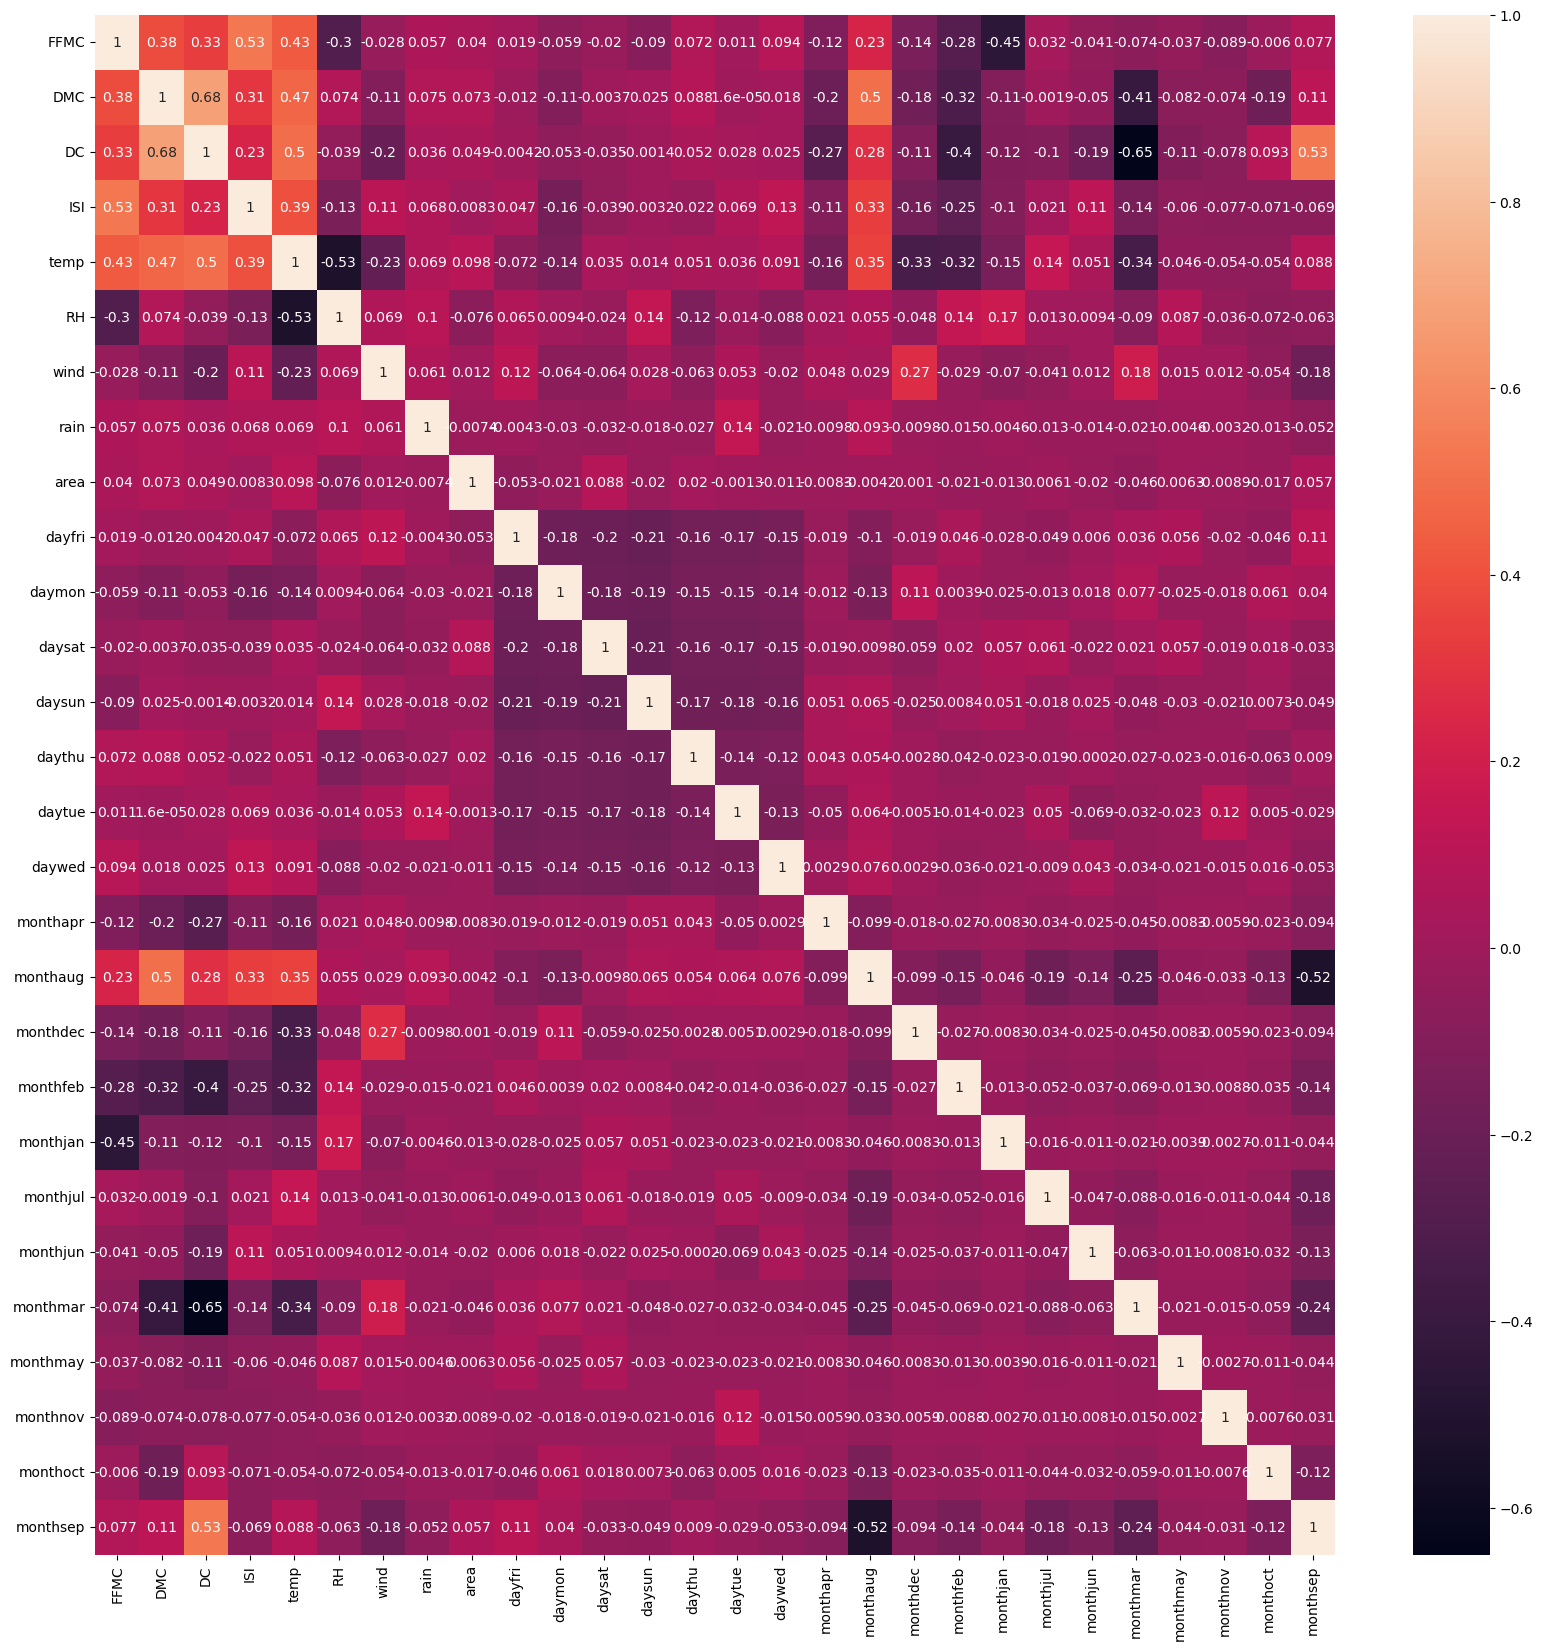

In [5]:
import seaborn as sns 
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [6]:
df[df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [7]:
df2 = df.drop_duplicates()

In [8]:
df2[df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category


In [9]:
from numpy import set_printoptions 
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder

In [10]:
df3 = df2.reset_index()
df3

,index,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,...,0,0,0,0,1,0,0,0,0,small
1,1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,...,0,0,0,0,0,0,0,1,0,small
2,2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,...,0,0,0,0,0,0,0,1,0,small
3,3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,...,0,0,0,0,1,0,0,0,0,small
4,4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,...,0,0,0,0,0,0,0,0,0,large
505,513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,...,0,0,0,0,0,0,0,0,0,large
506,514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,...,0,0,0,0,0,0,0,0,0,large
507,515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,...,0,0,0,0,0,0,0,0,0,small


In [11]:
df3 = df3.drop(['index','month','day'], axis=1)
df3

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
505,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
506,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
507,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [12]:
lc = LabelEncoder()
df3.size_category = lc.fit_transform(df3.size_category)
df3

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
505,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
506,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
507,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
x = df3.drop(['size_category'], axis=1)
y = df3[['size_category']]

In [14]:
best_features = SelectKBest(score_func=mutual_info_regression, k='all')
fit = best_features.fit(x,y)

In [15]:
scores = fit.scores_
features = fit.transform(x)

In [16]:
scores_df = pd.DataFrame(list(zip(scores, x.columns)), columns=['Score','Feature'])
scores_df.sort_values(by='Score', ascending = False, inplace=True)
scores_df

,Score,Feature
8,0.580434,area
24,0.097509,monthmay
13,0.048194,daythu
19,0.046692,monthfeb
10,0.042904,daymon
4,0.036439,temp
20,0.032227,monthjan
7,0.028586,rain
15,0.019569,daywed
1,0.017114,DMC


In [17]:
df4 = df3.drop(['monthmay','monthjan','monthoct','monthnov','daytue','monthfeb','monthaug','monthapr','daywed','daysun','dayfri','rain','monthsep'], axis=1)

In [18]:
df4

,FFMC,DMC,DC,ISI,temp,RH,wind,area,daymon,daysat,daythu,monthdec,monthjul,monthjun,monthmar,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.00,0,0,0,0,0,0,1,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.00,0,0,0,0,0,0,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.00,0,1,0,0,0,0,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.00,0,0,0,0,0,0,1,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.00,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,81.6,56.7,665.6,1.9,27.8,32,2.7,6.44,0,0,0,0,0,0,0,0
505,81.6,56.7,665.6,1.9,21.9,71,5.8,54.29,0,0,0,0,0,0,0,0
506,81.6,56.7,665.6,1.9,21.2,70,6.7,11.16,0,0,0,0,0,0,0,0
507,94.4,146.0,614.7,11.3,25.6,42,4.0,0.00,0,1,0,0,0,0,0,1


In [19]:
df4.size_category.value_counts()

1    371
0    138
Name: size_category, dtype: int64

In [20]:
x1 = df4.drop(['size_category'], axis=1)
y1 = df4[['size_category']]

In [21]:
model = Sequential()
model.add(Dense(16, input_dim=15, activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
results = model.fit(x1,y1, validation_split = 0.2, epochs=100, batch_size=10)

Epoch 1/100
41/41 [==============================] - 1s 7ms/step - loss: 10.4148 - accuracy: 0.6216 - val_loss: 9.3514 - val_accuracy: 0.4118
Epoch 2/100
41/41 [==============================] - 0s 3ms/step - loss: 2.2464 - accuracy: 0.7297 - val_loss: 3.2908 - val_accuracy: 0.5098
Epoch 3/100
41/41 [==============================] - 0s 2ms/step - loss: 1.0458 - accuracy: 0.7666 - val_loss: 0.8047 - val_accuracy: 0.6961
Epoch 4/100
41/41 [==============================] - 0s 2ms/step - loss: 0.6483 - accuracy: 0.8256 - val_loss: 0.4744 - val_accuracy: 0.8235
Epoch 5/100
41/41 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.8034 - val_loss: 0.5013 - val_accuracy: 0.7451
Epoch 6/100
41/41 [==============================] - 0s 2ms/step - loss: 0.3275 - accuracy: 0.8943 - val_loss: 0.3633 - val_accuracy: 0.8137
Epoch 7/100
41/41 [==============================] - 0s 2ms/step - loss: 0.3761 - accuracy: 0.8722 - val_loss: 0.2487 - val_accuracy: 0.8725
Epoch 8/100


Epoch 59/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0401 - accuracy: 0.9853 - val_loss: 0.1214 - val_accuracy: 0.9412
Epoch 60/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0415 - accuracy: 0.9828 - val_loss: 0.1157 - val_accuracy: 0.9412
Epoch 61/100
41/41 [==============================] - 0s 2ms/step - loss: 0.1034 - accuracy: 0.9607 - val_loss: 0.0800 - val_accuracy: 0.9608
Epoch 62/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0992 - accuracy: 0.9558 - val_loss: 0.2264 - val_accuracy: 0.9216
Epoch 63/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0581 - accuracy: 0.9754 - val_loss: 0.1510 - val_accuracy: 0.9412
Epoch 64/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0447 - accuracy: 0.9779 - val_loss: 0.0782 - val_accuracy: 0.9706
Epoch 65/100
41/41 [==============================] - 0s 2ms/step - loss: 0.1223 - accuracy: 0.9558 - val_loss: 0.8420 - val_accuracy: 0.8627
Epoch 

In [24]:
scores = model.evaluate(x1,y1)

16/16 [==============================] - 0s 1ms/step - loss: 0.0307 - accuracy: 0.9882


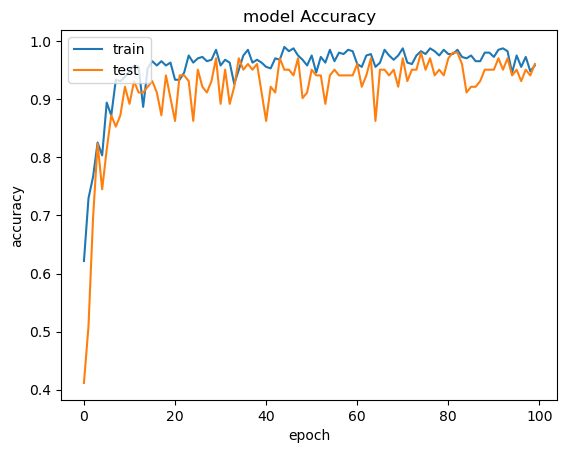

In [25]:
#Summarize History 
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

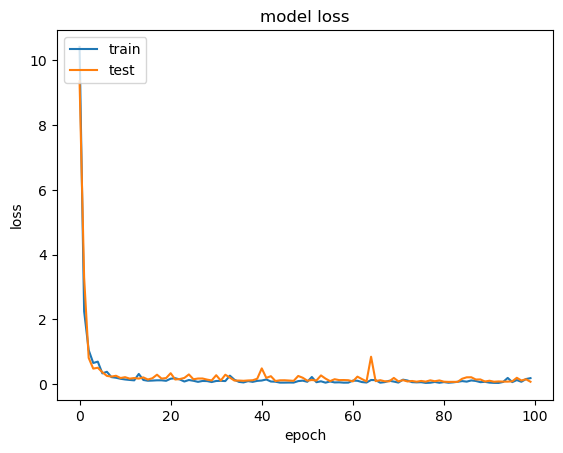

In [26]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()